# Digital Signal and Image Management

## Assignment #3

Implementare uno script di image stitching tra due immagini, partendo dalle istruzioni viste ad esercitazione.

### Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
plt.rcParams['figure.figsize'] = 10, 5

%matplotlib inline

Dopo aver importato i pacchetti necessari si caricano le 2 immagini necessarie ad effettuare lo *stitching*.

In [2]:
im1 = cv.imread('images/boat1.jpg', 0)
im2 = cv.imread('images/boat3.jpg', 0)

Le plottiamo per visualizzare l'entità del problema

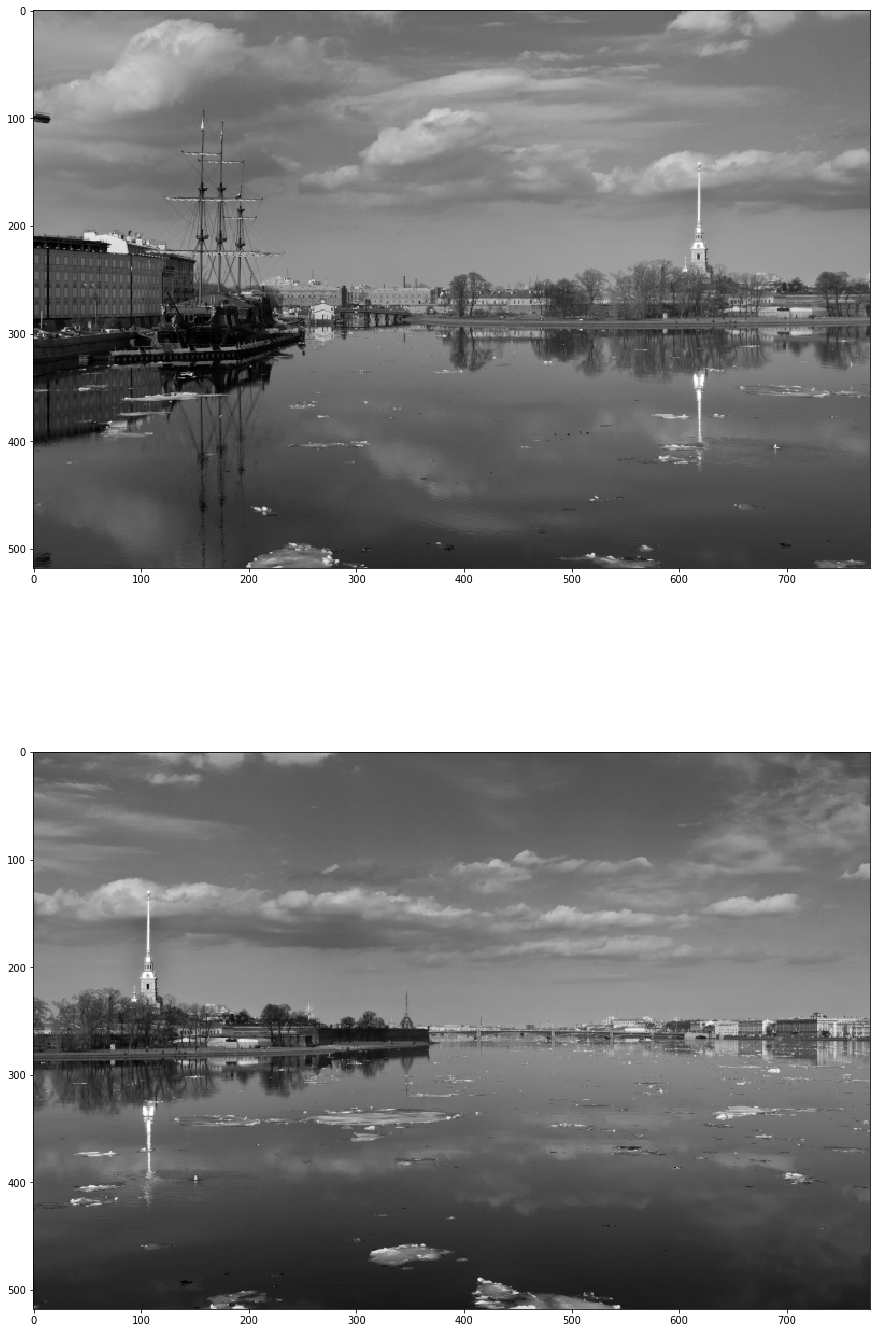

In [4]:
f, axes = plt.subplots(2,1, figsize = (15,25))
axes[0].imshow(im1, cmap = 'gray')
axes[1].imshow(im2, cmap = 'gray')

Inizializiamo l'algoritmo **SIFT** per l'individuazione e la descrizione dei *keypoints* all'interno delle due immagini.

In [5]:
sift = cv.xfeatures2d.SIFT_create()
(kps1, features1) = sift.detectAndCompute(im1, None)
(kps2, features2) = sift.detectAndCompute(im2, None)

Una volta identificati i nostri *keypoints* provveddiamo ad effettuare un matching tra i *keypoints* della prima immagine e quelli della seconda immagine. La procedura di *matching* è di tipo *cross-check* per ridurre al minimo il numero di falsi positivi.

In [6]:
bf = cv.BFMatcher(crossCheck = True)
matches = bf.match(features1, features2)

A questo punto rappresentiamo i migliori *match* identificati tra i *keypoints* presenti nelle due foto. Come si può vedere gli elementi più caratteristici delle immagini, primo fra tutti il campanile, vengono identificati come punti in comune tra le due immagini.

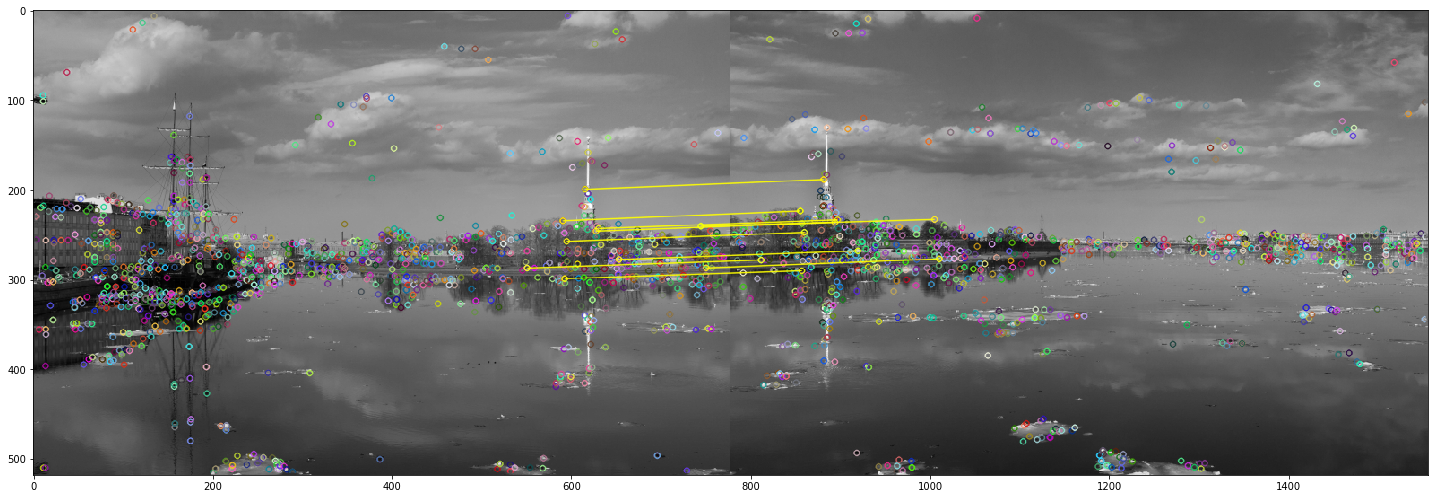

In [7]:
matches = sorted(matches, key = lambda x:x.distance)
res = cv.drawMatches(im1, kps1, im2, kps2, matches[:10], None, matchColor = [255,255,0])
plt.figure(figsize=(25,20))
plt.imshow(res)

In [8]:
print("{k1} keypoints identificati nell'immagine 1 e {k2} identificati nell'immagine 2".format(k1 = len(kps1),
                                                                                               k2 = len(kps2)))

1193 keypoints identificati nell'immagine 1 e 851 identificati nell'immagine 2


In [9]:
dx = []
for elem in range(0,len(matches)):
    tmp_dx = matches[elem].queryIdx
    dx.append(kps1[tmp_dx].pt)
    
dx_array = np.asarray(dx)

In [10]:
sx = []
for elem in range(0,len(matches)):
    tmp_sx = matches[elem].trainIdx
    sx.append(kps2[tmp_sx].pt)

sx_array = np.asarray(sx)

Procediamo ad effettuare l'operazione di **omografia**, ovvero identificare la matrice di trasformazione **H** che mappa i punti dell'immagine 2 nei punti corrispondenti presenti nell'immagine 1.

In [11]:
H, mask = cv.findHomography(sx_array, dx_array, method=cv.RANSAC)
H

array([[ 5.70309614e-01, -7.49227374e-03,  5.20668184e+02],
       [-1.52729587e-01,  9.20766455e-01,  2.95572968e+01],
       [-5.49987574e-04, -1.61803365e-05,  1.00000000e+00]])

Una volta realizzata la matrice **H** procediamo a rimappare i punti dell'immagine 2 nei corrispondenti dell'immagine 1 avvalendoci proprio della matrice **H** ricavata in precedenza.

In [12]:
temp = cv.warpPerspective(im2, H, dsize=(1100, 518))

Plottiamo il risultato del remapping dell'immagine 2

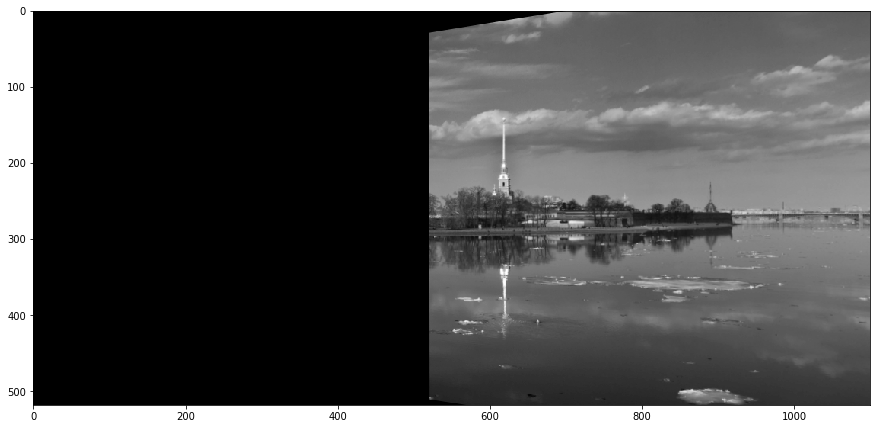

In [13]:
plt.figure(figsize=(15,8))
plt.imshow(temp, cmap='gray')

In [14]:
im1.shape, im2.shape, temp.shape

((518, 778), (518, 778), (518, 1100))

Dall'immagine 2 trasformata possiamo vedere come effettivamente gli oggetti presenti anche nell'immagine 1 si trovino nella stessa posizione proprio dell'immagine di destinazione.

Procediamo allora a restringere la nostra immagine 2 rimappata, riducendola alla sola porzione che intendiamo attaccare all'immagine 1 per prolungarla.

In [15]:
app = temp[0:518, 779:]

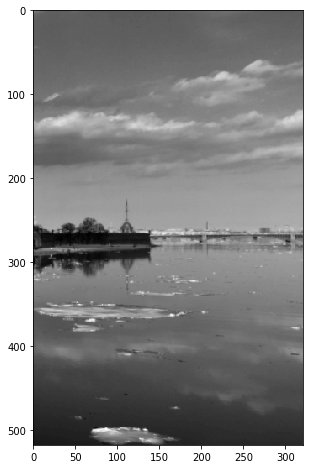

In [16]:
plt.figure(figsize=(15,8))
plt.imshow(app, cmap = 'gray')

Concludiamo concatenando le due immagini e plottando il risultato.

In [17]:
fin = np.concatenate((im1, app), axis=1)

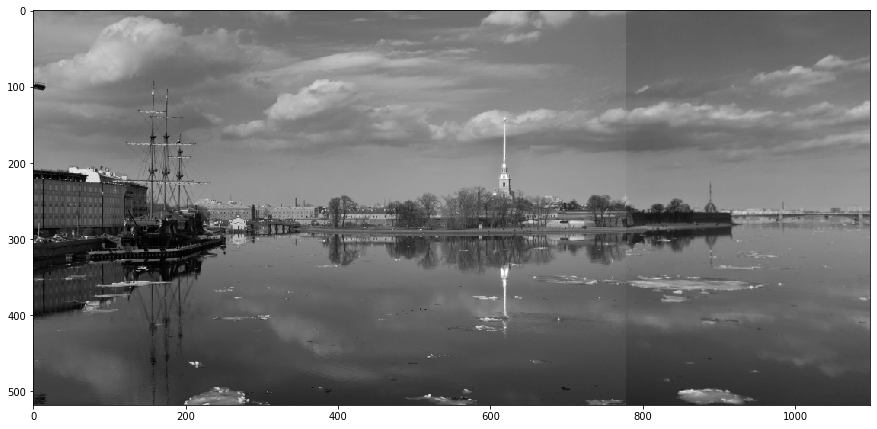

In [18]:
plt.figure(figsize=(15,8))
plt.imshow(fin, cmap='gray')

Come si può vedere il procedimento è riuscito ed il risultato è coerente con quanto ci si aspettava anche se si può ancora chiaramente distinguere il punto di attaccamento delle 2 immagini.